In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from collections import defaultdict

%matplotlib inline

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
plt.rc('font', size=16)

In [15]:
def load_files(filename, model = 'FM2', truth_e=25):
    data = defaultdict(list)
    algos_set = False
    for i in range(1001):
        try:
            with open(filename % i, 'rb') as f:
                single = pickle.load(f)
        except:
            continue
        if not algos_set:
            algos = list(single.keys())
            algos_set = True
        for k, v in single.items():
            if not k.endswith('_e'):
                for dim in ['x', 'y']:
                    data[k + '_' + dim].append(v[dim])
            elif k.endswith('n_e'):
                data[k].append(v['e'])
            elif k.endswith('x_e'):
                data[k].append(v)

    algos.remove('truth')
    
    if model == 'FM3':
        algos.remove('BOLFI_median_e')
        algos.remove('BOLFI_mean_e')
        algos.remove('pax_e')
        
    df = pd.DataFrame(data)
    df['truth_r'] = (df['truth_x']**2 + df['truth_y']**2)**0.5
    
    print('Mean distance from true position over %d reconstructed events' % len(df))
    for algo in algos:
        df[algo + '_d'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2)**0.5
        print(algo, "%.2f cm" % df[algo + '_d'].mean())
    
    for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
        algo_e = algo
        if algo in ['PosRecTopPatternFit', 'PosRecNeuralNet']:
            algo_e = 'pax'
        df[algo + '_d_e'] = ((df[algo + '_x'] - df['truth_x'])**2 + (df[algo + '_y'] - df['truth_y'])**2 + (df[algo_e + '_e'] - truth_e)**2)**0.5
    
    return df, algos

In [16]:
# Files
# FM3_e25_lognorm_top/bolfi_results_%d.pkl  # DONE
# FM3_e25_lognorm/bolfi_results_%d.pkl      # DONE
# FM3_e10_lognorm_top/bolfi_results_%d.pkl  # DONE
# FM3_e10_lognorm/bolfi_results_%d.pkl      # DONE

In [17]:
df_top_25, algos_1 = load_files("FM3_e25_lognorm_top/bolfi_results_%d.pkl", 'FM3', 25)
df_top_10, algos_2 = load_files("FM3_e10_lognorm_top/bolfi_results_%d.pkl", 'FM3', 10)
df_full_25, algos_3 = load_files("FM3_e25_lognorm/bolfi_results_%d.pkl", 'FM3', 25)
df_full_10, algos = load_files("FM3_e10_lognorm/bolfi_results_%d.pkl", 'FM3', 10)
assert set(algos_1) == set(algos_2) == set(algos_3) == set(algos)

Mean distance from true position over 1000 reconstructed events
PosRecNeuralNet 1.07 cm
BOLFI_mean 0.74 cm
PosRecTopPatternFit 0.75 cm
BOLFI_median 0.74 cm
BOLFI_mode 2.64 cm
Mean distance from true position over 1000 reconstructed events
PosRecNeuralNet 1.56 cm
BOLFI_mean 1.08 cm
PosRecTopPatternFit 1.14 cm
BOLFI_median 1.07 cm
BOLFI_mode 2.67 cm
Mean distance from true position over 944 reconstructed events
PosRecNeuralNet 1.13 cm
BOLFI_mean 0.83 cm
PosRecTopPatternFit 0.83 cm
BOLFI_median 0.82 cm
BOLFI_mode 3.47 cm
Mean distance from true position over 840 reconstructed events
PosRecNeuralNet 1.64 cm
BOLFI_mean 1.15 cm
PosRecTopPatternFit 1.16 cm
BOLFI_median 1.13 cm
BOLFI_mode 3.74 cm


In [18]:
df_top_25.head()

,BOLFI_mean_e,BOLFI_mean_x,BOLFI_mean_y,BOLFI_median_e,BOLFI_median_x,BOLFI_median_y,BOLFI_mode_x,BOLFI_mode_y,PosRecNeuralNet_x,PosRecNeuralNet_y,...,truth_y,truth_r,PosRecNeuralNet_d,BOLFI_mean_d,PosRecTopPatternFit_d,BOLFI_median_d,BOLFI_mode_d,BOLFI_mean_d_e,PosRecTopPatternFit_d_e,PosRecNeuralNet_d_e
0,22.731245,6.602894,35.116622,22.695793,6.610678,35.077871,8.048878,36.619725,6.612527,35.153985,...,35.87631,36.523671,0.759148,0.797666,0.340796,0.832421,1.413989,2.404895,2.755051,2.837335
1,23.885657,-8.272586,32.091942,23.870874,-8.253209,32.063738,-6.487798,29.677922,-9.048041,32.047686,...,32.33593,33.387052,0.790832,0.247089,0.211595,0.278386,3.223554,1.141408,1.647260,1.814968
2,24.051807,10.510957,10.885287,23.972839,10.475184,10.855829,9.745871,12.232411,10.642259,11.750431,...,11.12319,15.026381,0.827307,0.472421,0.337120,0.458415,1.165236,1.059364,0.539408,0.928304
3,23.792165,-7.065825,13.558252,23.699095,-7.154598,13.569022,-2.659496,15.066307,-7.265827,13.903843,...,13.93507,15.587288,0.283472,0.385583,0.366661,0.403816,4.470093,1.267888,1.569779,1.552457
4,26.743907,-17.694974,-25.168860,26.630044,-17.643525,-25.194401,-16.993416,-28.774752,-16.871396,-24.957481,...,-24.28955,29.368141,0.760512,1.477400,0.868006,1.452159,4.511420,2.285590,2.099384,2.057269


# Histograms

In [ ]:
# TPF, NN, BOLFI_mean
# 10, 25e
# top, full

# x,y histograms

# x,y,e histogram

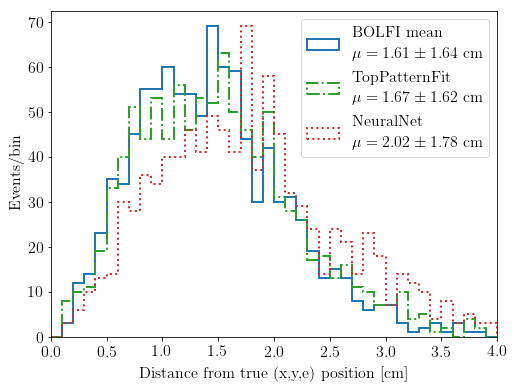

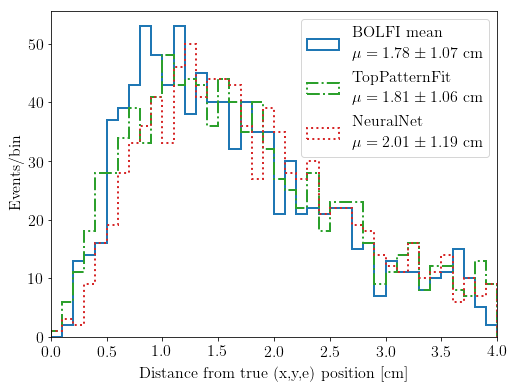

In [26]:
nbins = 40
hist_r = (0, 4)
r_cut = False

# FM3 paper plots s2_electrons = 10, top
plt.figure(figsize=(8,6))
for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_top_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle=':',
                 histtype='step', linewidth=2, color='C3', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_top_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-.',
                 histtype='step', linewidth=2, color='C2', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    else:
        pl_df = df_top_10
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-',
                 histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
        
        # pl_df = df_top_10
        # if r_cut:
        #     pl_df = pl_df[pl_df['truth_r'] > 30]
        # mu = pl_df[algo + '_d'].mean()
        # std = pl_df[algo + '_d'].std()
        # plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, linestyle='--',
        #          histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Euclidean\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
plt.legend(loc='upper right')
plt.xlabel('Distance from true (x,y,e) position [cm]')
plt.ylabel('Events/bin')
plt.xlim(*hist_r)
if r_cut:
    plt.savefig('FM3_top_xye_s2_electrons_10_r_30.png', bbox_inches='tight', dpi=150)
else:
    plt.savefig('FM3_top_xye_s2_electrons_10.png', bbox_inches='tight', dpi=150)
plt.show()

## FM3 paper plots s2_electrons = 25
plt.figure(figsize=(8,6))
for algo in ['BOLFI_mean', 'PosRecTopPatternFit', 'PosRecNeuralNet']:
    if algo in ['BOLFI_mode', 'BOLFI_median']:
        continue
    if algo == 'PosRecNeuralNet':
        pl_df = df_top_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle=':',
                 histtype='step', linewidth=2, color='C3', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    elif algo == 'PosRecTopPatternFit':
        pl_df = df_top_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-.',
                 histtype='step', linewidth=2, color='C2', label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
    else:
        pl_df = df_top_25
        if r_cut:
            pl_df = pl_df[pl_df['truth_r'] > 30]
        mu = pl_df[algo + '_d_e'].mean()
        std = pl_df[algo + '_d_e'].std()
        plt.hist(pl_df[algo + '_d_e'], bins = nbins, range=hist_r, linestyle='-',
                 histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + '\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
        
        # pl_df = df_top_10
        # if r_cut:
        #     pl_df = pl_df[pl_df['truth_r'] > 30]
        # mu = pl_df[algo + '_d'].mean()
        # std = pl_df[algo + '_d'].std()
        # plt.hist(pl_df[algo + '_d'], bins = nbins, range=hist_r, linestyle='--',
        #          histtype='step', linewidth=2, label=algo.replace('_', ' ').replace('PosRec', '') + ', Euclidean\n$\mu=%.2f \pm %.2f$ cm' % (mu, std))
plt.legend(loc='upper right')
plt.xlabel('Distance from true (x,y,e) position [cm]')
plt.ylabel('Events/bin')
plt.xlim(*hist_r)
if r_cut:
    plt.savefig('FM3_top_xye_s2_electrons_25_r_30.png', bbox_inches='tight', dpi=150)
else:
    plt.savefig('FM3_top_xye_s2_electrons_25.png', bbox_inches='tight', dpi=150)
plt.show()

# Radial plot

In [44]:
dfs = {'df_top_25': df_top_25,
       'df_top_10': df_top_10,
       'df_full_25': df_full_25,
       'df_full_10': df_full_10,}

In [36]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [55]:
def get_rolling(df, algo, ws=100):
    test = df[['truth_r', algo + '_d_e']].sort_values('truth_r')
    roll = test.rolling(ws).agg([percentile(25), 'mean', 'max']).dropna()
    rs = roll['truth_r']['mean']
    means = roll[algo + '_d_e']['mean']
    maxs = roll[algo + '_d_e']['max']
    mins = roll[algo + '_d_e']['percentile_25']
    return rs, mins, means, maxs

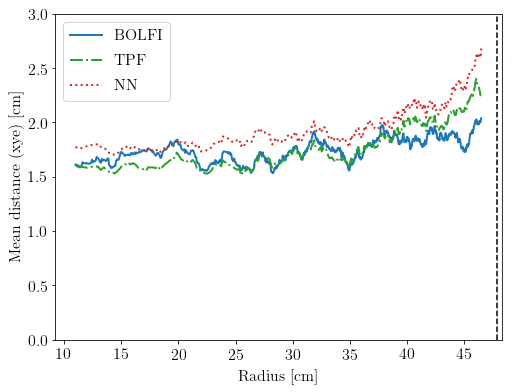

In [59]:
plt.figure(figsize=(8,6))

rs, mins, means, maxs = get_rolling(df_top_25, 'BOLFI_mean')
plt.plot(rs, means, linewidth=2, label='BOLFI')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

#rs, mins, means, maxs = get_rolling(df_top_25, 'BOLFI_mean')
#plt.plot(rs, means, linewidth=2, label='BOLFI (Euclidean)', linestyle='--')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_top_25, 'PosRecTopPatternFit')
plt.plot(rs[::3], means[::3], linewidth=2, label='TPF', linestyle='-.', color='C2')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_top_25, 'PosRecNeuralNet')
plt.plot(rs[::3], means[::3], linewidth=2, label='NN', linestyle=':', color='C3')
#plt.fill_between(rs, maxs, mins, alpha=0.1)

plt.axvline(47.9, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.ylim(0, 3)
plt.xlabel('Radius [cm]')
plt.ylabel('Mean distance (xye) [cm]')
plt.savefig('FM3_radial_xye_mean_25_paper.png', bbox_inches='tight', dpi=150)
plt.show()

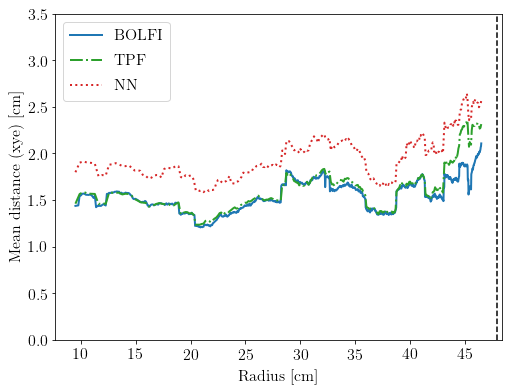

In [61]:
plt.figure(figsize=(8,6))

rs, mins, means, maxs = get_rolling(df_top_10, 'BOLFI_mean')
plt.plot(rs, means, linewidth=2, label='BOLFI')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

#rs, mins, means, maxs = get_rolling(df_eu_10, 'BOLFI_mean')
#plt.plot(rs, means, linewidth=2, label='BOLFI (Euclidean)', linestyle='--')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_top_10, 'PosRecTopPatternFit')
plt.plot(rs[::3], means[::3], linewidth=2, label='TPF', linestyle='-.', color='C2')
#plt.fill_between(rs, maxs, mins, alpha=0.2)

rs, mins, means, maxs = get_rolling(df_top_10, 'PosRecNeuralNet')
plt.plot(rs[::3], means[::3], linewidth=2, label='NN', linestyle=':', color='C3')
#plt.fill_between(rs, maxs, mins, alpha=0.1)

plt.axvline(47.9, color='k', linestyle='--')
plt.legend(loc='upper left')
plt.ylim(0, 3.5)
plt.xlabel('Radius [cm]')
plt.ylabel('Mean distance (xye) [cm]')
plt.savefig('FM3_radial_xye_mean_10_paper.png', bbox_inches='tight', dpi=150)
plt.show()